<a href="https://colab.research.google.com/github/gramelon2003/Python_ptdl/blob/master/Python_pandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


B1:
Dùng pandas đọc tập tin trên vào 1 dataframe.

In [ ]:
link = 'https://drive.google.com/file/d/18AcSNACGTKF_9OBftn5wFnb4v4ByWqqC/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv') 
 
df = pd.read_csv('xclara.csv')
print(df)

                           Region               Country   Item Type  \
0    Middle East and North Africa                 Libya   Cosmetics   
1                   North America                Canada  Vegetables   
2    Middle East and North Africa                 Libya   Baby Food   
3                            Asia                 Japan      Cereal   
4              Sub-Saharan Africa                  Chad      Fruits   
..                            ...                   ...         ...   
995  Middle East and North Africa            Azerbaijan      Snacks   
996                        Europe               Georgia   Baby Food   
997  Middle East and North Africa  United Arab Emirates  Vegetables   
998                        Europe               Finland   Household   
999                        Europe              Portugal      Cereal   

    Sales Channel Order Priority  Order Date   Order ID   Ship Date  \
0         Offline              M  10/18/2014  686800706  10/31/2014   
1    

B2:
Hãy hiển thị các thông số sau của tập dữ liệu:

a. Hiển thị 10 hàng đầu tiên của tập dữ liệu (gợi ý: hàm head() );

b. Hiển thị kích thước của tập dữ liệu (gợi ý: shape);

c. Hiển thị danh sách các cột(gợi ý: columns và chuyển cấu trúc Index của các
columns về dạng list bằng hàm ép kiểu list()).

2a: 10 dòng đầu

In [ ]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
5,Europe,Armenia,Cereal,Online,H,11/24/2014,683458888,12/28/2014,9528,205.70,117.11,1959909.60,1115824.08,844085.52
6,Sub-Saharan Africa,Eritrea,Cereal,Online,H,3/4/2015,679414975,4/17/2015,2844,205.70,117.11,585010.80,333060.84,251949.96
7,Europe,Montenegro,Clothes,Offline,M,5/17/2012,208630645,6/28/2012,7299,109.28,35.84,797634.72,261596.16,536038.56
8,Central America and the Caribbean,Jamaica,Vegetables,Online,H,1/29/2015,266467225,3/7/2015,2428,154.06,90.93,374057.68,220778.04,153279.64
9,Australia and Oceania,Fiji,Vegetables,Offline,H,12/24/2013,118598544,1/19/2014,4800,154.06,90.93,739488.00,436464.00,303024.00


2b: kích thước

In [ ]:
df.shape

(1000, 14)

2c: tên cột

In [ ]:
list(df.columns)

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

3: 
Trích rút dữ liệu:

a. Trích rút cột dữ liệu (định tính) – Country của tập dữ liệu, và in ra màn hình 5 hàng đầu tien của cột này;

b. Trích rút cột dữ liệu (định lượng) – Total Cost của tập dữ liệu và in ra màn hình 5 hàng đầu tien của cột này.

3a

In [ ]:
a = df.loc[:,"Country"]
a.head(5)

0     Libya
1    Canada
2     Libya
3     Japan
4      Chad
Name: Country, dtype: object

3b

In [ ]:
b = df.loc[:,"Total Cost"]
b.head(5)

0    2224085.18
1     274426.74
2     241840.14
3     389039.42
4      68127.40
Name: Total Cost, dtype: float64

4:
Phân tích thống kê mô tả với tập dữ liệu định lượng:

a. Tính các chỉ số thống kê sau và xuất kết quả ra màn hình: (1) Số lớn nhất - max; (2) Số nhỏ nhất - min; (3) Giá trị trung bình - mean; (4) Giá trị trung vị - median; (5) Phương sai - variance; (6) Độ lệch chuẩn - standard deviation; (7) Q1 và Q3. 

b. Hãy vẽ biểu đồ boxplot cho tập dữ liệu định lượng này;

c. Hãy vẽ biểu đồ histogram (với bins = 100) cho tập dữ liệu này.

4a

In [ ]:
b = df.drop(columns = ["Region", "Country", "Item Type", "Sales Channel", "Order Priority", "Order Date", "Order ID", "Ship Date"])
print(b)

     Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
0          8446      437.20     263.33     3692591.20  2224085.18   
1          3018      154.06      90.93      464953.08   274426.74   
2          1517      255.28     159.42      387259.76   241840.14   
3          3322      205.70     117.11      683335.40   389039.42   
4          9845        9.33       6.92       91853.85    68127.40   
..          ...         ...        ...            ...         ...   
995        6524      152.58      97.44      995431.92   635698.56   
996         288      255.28     159.42       73520.64    45912.96   
997        9556      154.06      90.93     1472197.36   868927.08   
998        9801      668.27     502.54     6549714.27  4925394.54   
999        3528      205.70     117.11      725709.60   413164.08   

     Total Profit  
0      1468506.02  
1       190526.34  
2       145419.62  
3       294295.98  
4        23726.45  
..            ...  
995     359733.36  
996      27

In [ ]:
print("max\n", b.max()) 
print("min\n", b.min()) 
print("mean\n", b.mean()) 
print("median\n", b.median())
print("var\n", b.var())
print("std\n", b.std())


max
 Units Sold          9998.00
Unit Price           668.27
Unit Cost            524.96
Total Revenue    6617209.54
Total Cost       5204978.40
Total Profit     1726181.36
dtype: float64
min
 Units Sold         13.00
Unit Price          9.33
Unit Cost           6.92
Total Revenue    2043.25
Total Cost       1416.75
Total Profit      532.61
dtype: float64
mean
 Units Sold       5.053988e+03
Unit Price       2.621068e+02
Unit Cost        1.849651e+02
Total Revenue    1.327322e+06
Total Cost       9.361192e+05
Total Profit     3.912026e+05
dtype: float64
median
 Units Sold         5184.000
Unit Price          154.060
Unit Cost            97.440
Total Revenue    754939.180
Total Cost       464726.065
Total Profit     277225.980
dtype: float64
var
 Units Sold       8.417979e+06
Unit Price       4.666510e+04
Unit Cost        3.072634e+04
Total Revenue    2.209726e+12
Total Cost       1.351571e+12
Total Profit     1.471798e+11
dtype: float64
std
 Units Sold       2.901375e+03
Unit Price     

4b

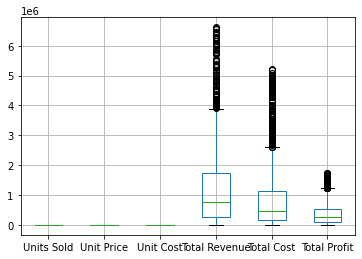

In [ ]:
boxplot = b.boxplot()

4c

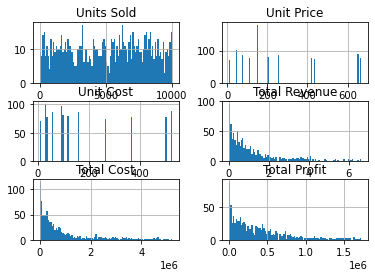

In [ ]:
hist = b.hist(bins=100)

5:
Phân tích thống kê mô tả với tập dữ liệu định tính:

a. Vẽ biểu đồ barplot cho tập dữ liệu này

b. Vẽ biểu đồ barplot cho 15 hàng dữ liệu đầu tiên của tập dữ liệu này

5.1